<div>
    <h1 style="margin: auto; padding: 20px 0; color:purple; text-align: center; font-size: 60px;">PROJET 10</h1>
    <h2 style="margin: auto; padding: 20px 0; color:purple; text-align: center; font-size: 30px;">Détecter des faux billets</h2>
</div>

<img src="Scenario.png" alt="Image" style="width:800px;"/>

<p style="font-size: 18px;">Vous êtes consultant Data Analyst dans une entreprise spécialisée dans la data. Votre entreprise a décroché une prestation en régie au sein de l’Organisation nationale de lutte contre le faux-monnayage (ONCFM). Cette institution a pour objectif de mettre en place des méthodes d’identification des contrefaçons des billets en euros. Ils font donc appel à vous, spécialiste de la data, pour mettre en place une modélisation qui serait capable d’identifier automatiquement les vrais des faux billets. Et ce à partir simplement de certaines dimensions du billet et des éléments qui le composent.</p>
</div>

<hr style="border: 3px solid black;">
<div>
    <h1 style="color:purple;font-size: 40px;">Plan de Travail</h1>

## 1. Importation des librairies
- Pandas 
- Numpy 
- Seaborn 
- Matplotlib 
- Sklearn 
- Statsmodels
    
## 2. Chargement des Données
### 2.1. Description de la base de données
### 2.2. Qualité des données

## 3.Traitement des valeurs manquantes
### 3.1 Regression linéaire multiple
- Utilisation de la méthode stepwise pour sélectionner les variables significatives
### 3.2 Vérification des hypothèses du modèle
-  Vérification de l'homoscédasticité
- Vérification de la multicolinéarité
- Vérification de la normalité
- Vérification de l'indépendance des résidus
### 3.3 Prédire les Valeurs Manquantes

## 4. Analyse Exploratoire des Données 
### 4.1. Analyse univariée
- Histogrammes et boxplots de chaque variable
### 4.2. Analyse bivariée
- Matrice de corrélation
- Pairplot pour visualiser les relations entre les variables.
### 4.3. Analyse multivariée
- Cercle de corrélation pour l'ACP	

## 5. Modélisation
### 5.1. Modèle de Régression Logistique
- Utilisation de la méthode stepwise pour sélectionner les variables significatives
- Entraînement du modèle de Régression Logistique
- Évaluation du modèle sur l'ensemble d'entraînement : courbe ROC, AUC,matrice de confusion, métriques de performance

### 5.2. Modèle K-Means
- Détermination du nombre optimal de clusters : méthode du coude
- Entraînement du modèle K-Means
- Évaluation du modèle sur l'ensemble d'entraînement : matrice de confusion, métriques de performance

## 6. Choix du modèle
- Comparaison des résultats du Modèle de Régression Logistique et du Modèle K-Means: matrice de confusion, métriques de performance

## 7. Test en direct
<hr style="border: 3px solid black;">

<div style="color: purple;">
    <h1>1- Importation des librairies</h1>
</div>

In [1]:
#Data
import pandas as pd
import numpy as np

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Metrics
from sklearn.metrics import roc_curve, auc, confusion_matrix

# Estimators
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

# Model selection
from sklearn.model_selection import train_test_split

# Statistics
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

<div style="color: purple;">
    <h1>2- Chargement des données</h1>
</div>

In [2]:
# Importer les données
df = pd.read_csv('billets.csv ', sep=';')

In [3]:
#Afficher les 5 premières lignes
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


<div style="color: black;">
    <h2>2.1- Description de la base de données</h2>
</div>

La base de données 'billets.csv' contient des informations géométriques d'un billet de banque:
 
- diagonal : la diagonale du billet en mm (variable numérique);
- height_left : la hauteur du billet mesurée sur le côté gauche en mm (variable numérique);
- height_right : la hauteur du billet mesurée sur le côté droit en mm (variable numérique) ;
- margin_low : la marge entre le bord inférieur du billet et l'image de celui-ci en mm (variable numérique);
- margin_up : la marge entre le bord supérieur du billet et l'image de celui-ci en mm (variable numérique);
- lenght : la longueur du billet en mm (variable numérique);
- is_genuine : authentifier un billet ( variable catégorielle).

<div style="color: black;">
    <h2>2.2- Qualité des données</h2>
</div>

In [4]:
#Résumé du data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


- Le nombre total d'entrées dans le DataFrame est 1500.
- 1500 valeurs non nulles dans chaque colonne sauf la colonne margin_low.
- 6 variables quantitatives et une variable qualitative.

In [5]:
#Compter le nombre de valeurs unique par colonne
df.nunique()

is_genuine        2
diagonal        159
height_left     155
height_right    170
margin_low      285
margin_up       123
length          336
dtype: int64

La colonne is_genuine contient que deux valeurs uniques. Vérifions les valeurs que peut prendre cette colonne.

In [6]:
# Vérifier les valeurs que prend la colonne is_genuine
df['is_genuine'].unique()

array([ True, False])

In [7]:
# Encoder la variable is_genuine
df['is_genuine'].replace([False,True], [0,1], inplace=True)
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54


In [8]:
#Vérifier les doublons
df.duplicated().sum()

0

Aucune ligne dupliquée dans la base de données.

In [9]:
#Compter le nombre de valeurs manquantes
df.isna().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

Nous avons 37 valeurs manquantes dans la colonne margin_low, nous allons imputer ces valeurs par une régression linéaire.

<div style="color: purple;">
    <h1>3- Traitement des valeurs manquantes </h1>
</div>

In [10]:
#Créer un DataFrame ne contenant pas de  valeurs manquantes (NaN)
complet_df = df.dropna()
complet_df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,0,171.75,104.38,104.17,4.42,3.09,111.28
1496,0,172.19,104.63,104.44,5.27,3.37,110.97
1497,0,171.80,104.01,104.12,5.51,3.36,111.95
1498,0,172.06,104.28,104.06,5.17,3.46,112.25


<div style="color: black; font-size: 13px;">
    <h2>3.1- Regression linéaire multiple</h2>
</div>

La régression linéaire permet d'expliquer de manière linéaire, une variable **Y (variable à expliquer)**, aléatoire en fonction de **p** variables  **(X1,…,Xp)**.

In [11]:
# Définir le modèle de régression linéaire multiple
formula = 'margin_low ~ is_genuine + diagonal + height_left + height_right + margin_up + length'

" ~ :sépare la variable dépendante (margin_low)  des variables indépendantes "

# Ajuster le modèle de régression linéaire multiple
reg_multi = smf.ols(formula, data=complet_df).fit()

# Afficher le résumé du modèle
print(reg_multi.summary())


                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     390.7
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          4.75e-299
Time:                        11:04:34   Log-Likelihood:                -774.14
No. Observations:                1463   AIC:                             1562.
Df Residuals:                    1456   BIC:                             1599.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.8668      8.316      0.345   

Nous constatons que certaines variables ne sont pas significatives car leur p-valeur n'est pas inférieure à 5 %, le niveau de test que nous souhaitons.

Le $R^{2}$ vaut 0.617 ce qui signifie que 61.7% de la variance de margin_low est expliquée par les variables indépendantes dans le modèle et le $R^{2}$ ajusté est 0.615, légèrement inférieur au $R^{2}$  ce qui indique que quelques variables n'améliorent pas significativement le modèle.

<div>
    <h1 style="color:brown;font-size: 15px;">Interpretation des différents coefficients de chaque variable</h1>

- **is_genuine** : si un billet est authentique, la valeur de margin_low est en moyenne réduite de 1.1406 d'unités par rapport à un billet non authentique en gardant toutes les autres variables constantes. 
- **diagonal** : une augmentation d'une unité dans la diagonale entraîne une diminution moyenne de 0.0130 d'unités de la valeur de margin_low. 
- **height_left** : une augmentation d'une unité de height_left est associée à une augmentation de 0.0283 d'unités de la valeur de margin_low. 
- **height_right** : une augmentation d'une unité de height_right est associée à une augmentation de 0.0267 d'unités de margin_low.
- **margin_up** : une augmentation d'une unité de margin_up est associée à une diminution de 0.2128 d'unités de margin_low. 
- **length** : une augmentation d'une unité de length est associée à une diminution de 0.0039 d'unités de margin_low.

Nous allons utiliser la méthode stepwise pour sélectionner les variables significatives. Pour cela nous allons retirer les non significatives en commençant par la moins significative: length, car elle a une p-valeur de 0.868. 

In [12]:
reg_multi = smf.ols('margin_low ~ is_genuine + diagonal + height_left + height_right + margin_up', data=complet_df).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     469.2
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          2.12e-300
Time:                        11:04:36   Log-Likelihood:                -774.15
No. Observations:                1463   AIC:                             1560.
Df Residuals:                    1457   BIC:                             1592.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.4247      7.873      0.308   

Nous constatons maintenant que diagonal est la moins significative avec une p-valeur de 0.719 donc on l'enlève.

In [13]:
reg_multi = smf.ols('margin_low ~ is_genuine + height_left + height_right + margin_up', data=complet_df).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     586.8
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          8.76e-302
Time:                        11:04:37   Log-Likelihood:                -774.21
No. Observations:                1463   AIC:                             1558.
Df Residuals:                    1458   BIC:                             1585.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.3902      5.476      0.071   

Il faut maintenant retirer la variable height_right avec une p-valeur de 0.496.

In [14]:
reg_multi = smf.ols('margin_low ~ is_genuine + height_left + margin_up', data=complet_df).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     782.5
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          3.63e-303
Time:                        11:04:38   Log-Likelihood:                -774.45
No. Observations:                1463   AIC:                             1557.
Df Residuals:                    1459   BIC:                             1578.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.9104      4.035      0.721      

Et on retire ensuite height_left.

In [15]:
reg_multi = smf.ols('margin_low ~ is_genuine + margin_up', data=complet_df).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     1174.
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          1.24e-304
Time:                        11:04:39   Log-Likelihood:                -774.73
No. Observations:                1463   AIC:                             1555.
Df Residuals:                    1460   BIC:                             1571.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.9263      0.198     30.003      0.0

On remarque qu'à présent toutes les variables sont significatives. Quant au $R^{2}$, il vaut toujours 0.617 ce qui signifie que la proportion de la variance de margin_low expliquée par le modèle reste la même après la suppression des variables non significatives. Cela indique que les variables supprimées n'ajoutaient pas d'information supplémentaire au modèle en termes de pouvoir explicatif.

Le $R^{2}$ ajusté a légèrement augmenté de 0.615 à 0.616. L'augmentation du $R^{2}$ ajusté suggère que le modèle est maintenant plus efficace et plus simple, en supprimant des variables non significatives qui ne contribuaient pas réellement à expliquer la variance de margin_low.

<div>
    <h1 style="color:brown; font-size: 15px; text-decoration: underline;">Conclusion</h1>
</div>
    
- Variables significatives : is_genuine et margin_up .
- Variables non significatives : diagonal, height_left, height_right, et length.
- Le fait que le $R^{2}$ soit resté constant montre que les variables retirées n'étaient pas essentielles pour la performance globale du modèle. Cela suggère que le modèle est robuste et que les variables restantes capturent bien la variabilité de margin_low.
<div>
    <h1 style="color:red;font-size: 16px;"> Equation de la régression linéaire: margin_low = -1.1632 * is_genuine - 0.2119 * margin_up + résidus</h1>
   

<div style="color: black; font-size: 13px;">
    <h2>3.2- Vérification des hypothèses du modèle</h2>
</div>

La vérification des hypothèses est crucial afin de garantir la validité et la fiabilité du modèle.


<div>
    <h3 style="color:blue; font-size: 15;"> - Vérification de l'homoscédasticité </h3>
</div>

La variance des résidus doit être constante à tous les niveaux de la variable prédite.

**Test de Breusch-Pagan** : utilisé pour détecter la présence d'hétéroscédasticité dans un modèle de régression linéaire
- $H0$: Les résidus ont une variance constante (pas d'hétéroscédasticité).
- $Ha$: Les résidus ont une variance non constante (hétéroscédasticité présente).

In [16]:
# Test de Breusch-Pagan
import statsmodels
from statsmodels.stats.diagnostic import het_breuschpagan
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(reg_multi.resid, reg_multi.model.exog)
print('p value test Breusch Pagan:', pval)

p value test Breusch Pagan: 3.2033559115838186e-36


La p-value extrêmement faible (inférieure à 5%), on  rejette l'hypothèse $H0$ selon laquelle les résidus ont une variance constante (présence d’hétéroscédasticité).

Nous allons mener des analyses sur les valeurs atypiques et/ou influentes en travaillant sur un dataframe appelé analyses.

In [17]:
# Calculer les leviers
influence = reg_multi.get_influence()
leverage = influence.hat_matrix_diag

In [18]:
# Calculer les seuils
n = len(complet_df)
k = len(reg_multi.params) - 1
leverage_threshold = 2 * (k + 1) / n
cooks_d_threshold = 4 / n
studentized_residuals_threshold = 2  # ou 3

In [19]:
alpha = 0.05

In [20]:
n = complet_df.shape[0]
p = 3

In [21]:
analyses = pd.DataFrame({'obs':np.arange(1, n+1)})
#analyses['obs'].astype('float', inplace=True)

In [22]:
#Calculer les leviers
analyses['levier'] = reg_multi.get_influence().hat_matrix_diag

seuil_levier = 2*p/n

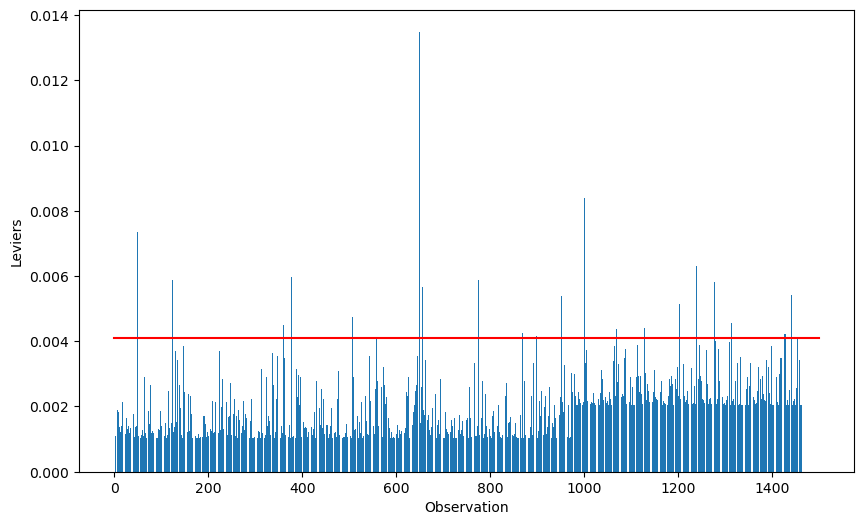

In [23]:
plt.figure(figsize=(10,6))
plt.bar(analyses['obs'], analyses['levier'])
plt.xticks(np.arange(0, 1500, step=200))
plt.xlabel('Observation')
plt.ylabel('Leviers')
plt.plot([0, 1500], [seuil_levier, seuil_levier], color='r')
plt.show()

Toutes les observations dont le levier est supérieur au seuil (0.0041) sont considérées comme ayant une influence significative sur le modèle.

In [24]:
#sélectionner les points pour lesquels le levier est supérieur au seuil
influent_points= analyses.loc[analyses['levier'] > seuil_levier, :]
influent_points

,obs,levier
4,5,0.004748
48,49,0.007353
52,53,0.010647
54,55,0.004408
123,124,0.005865
...,...,...
1441,1442,0.005428
1442,1443,0.004406
1444,1445,0.004648
1446,1447,0.004796


Avec 67 points influents sur 1463 observations, cela représente environ 4.6% des données. Bien que cela ne semble pas énorme, ces points peuvent avoir un impact significatif sur le modèle de régression.

Vérifions si les points influents changent de manière significative les coefficients du modèle.

In [25]:
# Régression sans les points influents
data_no_influent = complet_df[~complet_df.index.isin(influent_points.index)]
reg_no_influent = smf.ols('margin_low ~ is_genuine + margin_up', data=data_no_influent).fit()
print(reg_no_influent.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     1086.
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          4.22e-285
Time:                        11:04:59   Log-Likelihood:                -736.27
No. Observations:                1397   AIC:                             1479.
Df Residuals:                    1394   BIC:                             1494.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8434      0.203     28.783      0.0

$R^{2}$ est égale à $0.617$ avec les point influents et $0.609$ sans les points influents. L'augmentation du $R^{2}$ en incluant les points influents suggère que ces points ont une valeur pour le modèle et qu'ils aident à expliquer une plus grande partie de la variance dans les données. Cela indique que les points influents sont importants pour le modèle.

In [26]:
from scipy.stats import t
#Calculer les résidus studentisés
analyses['rstudent'] = reg_multi.get_influence().resid_studentized_internal
seuil_rstudent = t.ppf(1-alpha/2,n-p-1)

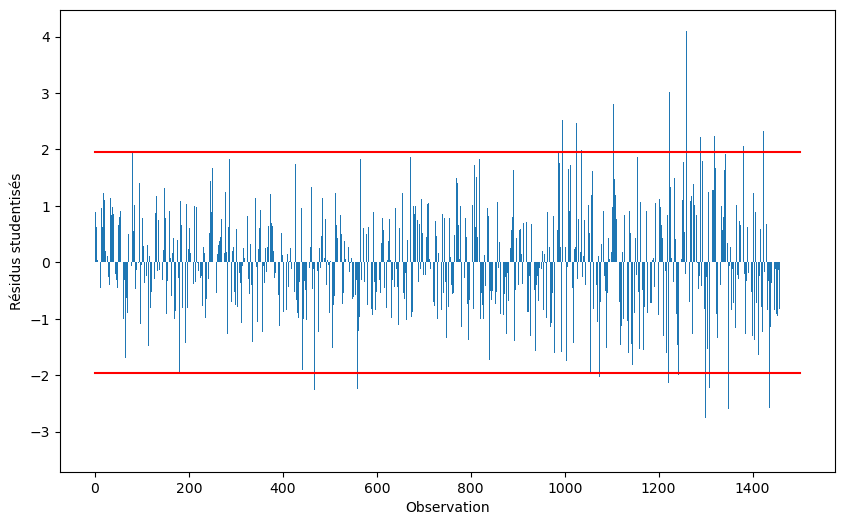

In [27]:
plt.figure(figsize=(10,6))
plt.bar(analyses['obs'], analyses['rstudent'])
plt.xticks(np.arange(0, 1500, step=200))
plt.xlabel('Observation')
plt.ylabel('Résidus studentisés')
plt.plot([0, 1500], [seuil_rstudent, seuil_rstudent], color='r')
plt.plot([0, 1500], [-seuil_rstudent, -seuil_rstudent], color='r')
plt.show()

In [28]:
# Calculer la distance de Cook
influence = reg_multi.get_influence().summary_frame()

La distance de Cook mesure l'influence d'une observation sur les coefficients du modèle. Les observations ayant une distance de Cook élevée sont celles qui ont une grande influence sur la régression.

In [29]:
analyses['dcooks'] = influence['cooks_d']
seuil_dcook = 4/(n-p)

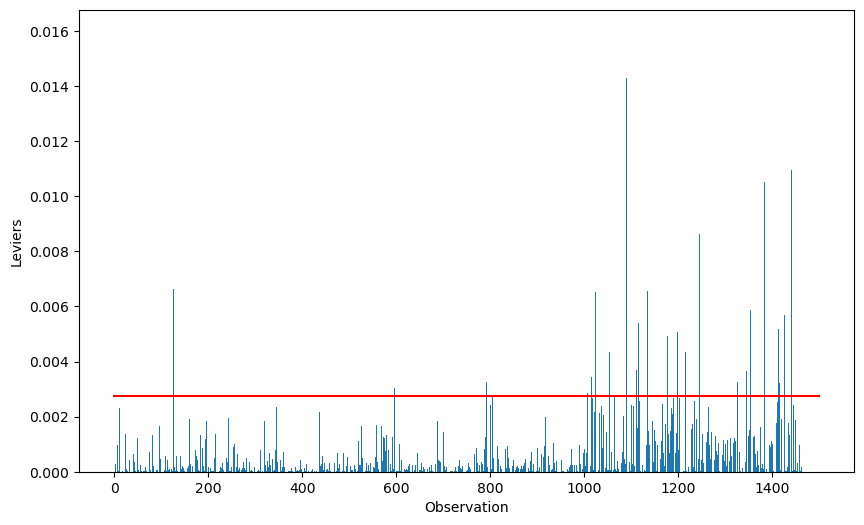

In [30]:
plt.figure(figsize=(10,6))
plt.bar(analyses['obs'], analyses['dcooks'])
plt.xticks(np.arange(0, 1500, step=200))
plt.xlabel('Observation')
plt.ylabel('Leviers')
plt.plot([0, 1500], [seuil_dcook, seuil_dcook], color='r')
plt.show()

Les observations avec des leviers de Cook au-dessus de la ligne rouge (le seuil) peuvent influencer le modèle de la régression.

<div>
    <h3 style="color:blue; font-size: 15;"> - Vérification de la multicolinéarité</h3>
</div>

Cette hypothèse concerne la relation entre les variables prédictives (ou indépendantes) dans notre modèle de régression linéaire. Elle stipule qu'il ne devrait pas y avoir de forte corrélation linéaire entre les variables indépendantes.

In [31]:
#Test de multicolinéarité
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = reg_multi.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

[1.5938854494007753, 1.5938854494007748]

Ici, tous les coefficients (VIF = 1.59) sont inférieurs à 10, donc la multicolinéarité n'est pas un problème majeur dans notre modèle. Cela signifie que les coefficients estimés pour is_genuine et margin_up sont fiables et interprétables.

<div>
    <h3 style="color:blue; font-size: 15;"> - Vérification de la normalité</h3>
</div>

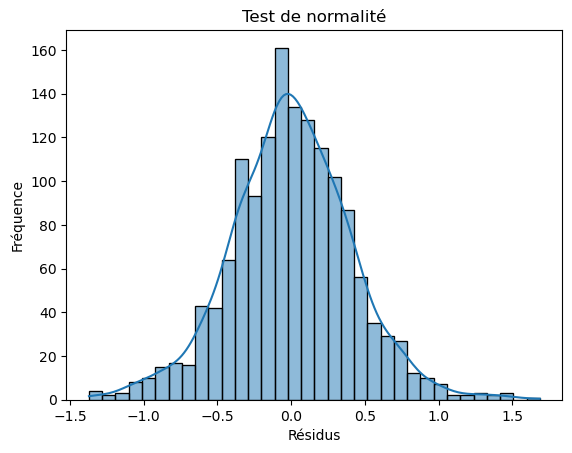

In [32]:
# Test de normalité
sns.histplot(reg_multi.resid, kde=True)
plt.title('Test de normalité')
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.show()

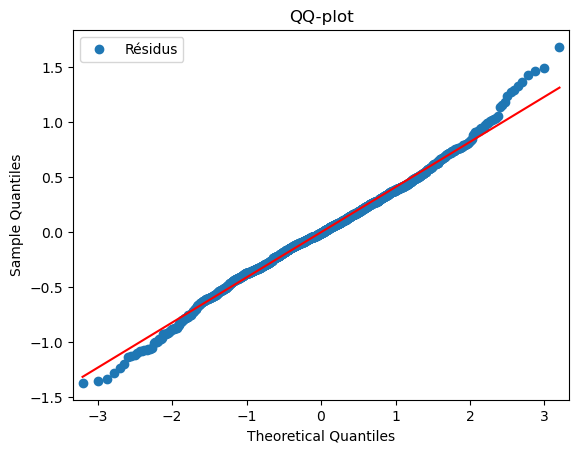

In [33]:
# QQ-plot
sm.qqplot(reg_multi.resid, line ='s', label='Résidus')
plt.title('QQ-plot')
plt.legend()
plt.show()

Dans le cas d'un échantillon issu d'une distribution normale, on doit observer un alignement presque parfait avec la première bissectrice du plan. Dans notre cas, nous observons des écarts par rapport à la première bissectrice .

**Test de Shapiro-Wilk** : 
- $H0$ : Les résidus suivent une distribution normale.
- $Ha$ : Les résidus ne suivent pas une distribution normale

In [34]:
from scipy.stats import shapiro
shapiro_test = shapiro(reg_multi.resid)
print(f'Test de Shapiro-Wilk: {shapiro_test}')

Test de Shapiro-Wilk: ShapiroResult(statistic=0.9936248064041138, pvalue=6.20942773821298e-06)


Ici, l'hypothèse de normalité est remise en cause car la p_valeur est inférieure à 5%. Ainsi, en combinant l'histogramme et le Q-Q plot avec le résultat du test de Shapiro-Wilk , nous pouvons conclure que les résidus de notre modèle ne suivent pas une distribution normale..

<div>
    <h3 style="color:blue; font-size: 15;"> - Vérification de  l'indépendance des résidus (facultative) </h3>
</div>

Le test de Durbin-Watson est utilisé pour détecter la présence d'autocorrélation dans les résidus d'une régression statistique. 

In [35]:
# Test d'autocorrélation (Durbin-Watson)
from statsmodels.stats.stattools import durbin_watson
dw_stat = durbin_watson(reg_multi.resid)
print(f'Statistique de Durbin-Watson: {dw_stat}')

Statistique de Durbin-Watson: 2.0410819121411508


La statistique de Durbin-Watson est 2.04 ce qui indique ce qui indique qu'il n'y a pas d'autocorrélation des résidus. Notre modèle de régression satisfait donc l'hypothèse d'indépendance des résidus.

<div>
    <h1 style="color:brown; font-size: 15px; text-decoration: underline;">Conclusion</h1>
</div>
    
- Normalité des résidus : <b style="color: red;">Non vérifiée</b>
- Homoscédasticité des résidus : <b style="color: red;">Non vérifiée</b>
- Absence de multicolinéarité : <b style="color: green;"> Vérifiée</b>
- Indépendance des erreurs : <b style="color: green;">Vérifiée</b>

$R^{2}$ = 0.617 supérieur à 0.5 donc le modèle est acceptable, nous pouvons donc passer à l'imputation des valeurs manquantes.

<div style="color: black; font-size: 13px;">
    <h2>3.3- Prédire les Valeurs Manquantes</h2>
</div>

In [37]:
# Créer un DataFrame contenant des valeurs manquantes (NaN) et sans margin_low
missing_df = df.loc[df["margin_low"].isnull(),['is_genuine','diagonal','height_left','height_right','margin_up','length']]
missing_df.head()

,is_genuine,diagonal,height_left,height_right,margin_up,length
72,1,171.94,103.89,103.45,3.25,112.79
99,1,171.93,104.07,104.18,3.14,113.08
151,1,172.07,103.80,104.38,3.02,112.93
197,1,171.45,103.66,103.80,3.62,113.27
241,1,171.83,104.14,104.06,3.02,112.36


In [38]:
# Sélectionner les variables indépendantes pour les prédictions
X_missing = missing_df[['is_genuine', 'margin_up']]

# Prédire les valeurs manquantes
predicted_margin_low = reg_multi.predict(X_missing)

In [39]:
# Ajouter les prédictions dans le DataFrame original
df.loc[df['margin_low'].isna(), 'margin_low'] = predicted_margin_low

In [40]:
# Vérifier des valeurs nulles
df.isnull().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

Les valeurs manquantes ont été imputées.

 <div style="color: purple">
    <h1>4- Analyse Exploratoire des Données </h1>
</div>

<div style="color: black; font-size: 13px;">
    <h2>4.1- Analyse univariée</h2>
</div>

In [41]:
#Résumé Statistique
df.describe()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,0.666667,171.958440,104.029533,103.920307,4.482863,3.151473,112.67850
std,0.471562,0.305195,0.299462,0.325627,0.659849,0.231813,0.87273
min,0.000000,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,0.000000,171.750000,103.820000,103.710000,4.027500,2.990000,112.03000
50%,1.000000,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,1.000000,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,1.000000,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


Vue d'ensemble de la distribution des données pour chaque variable.

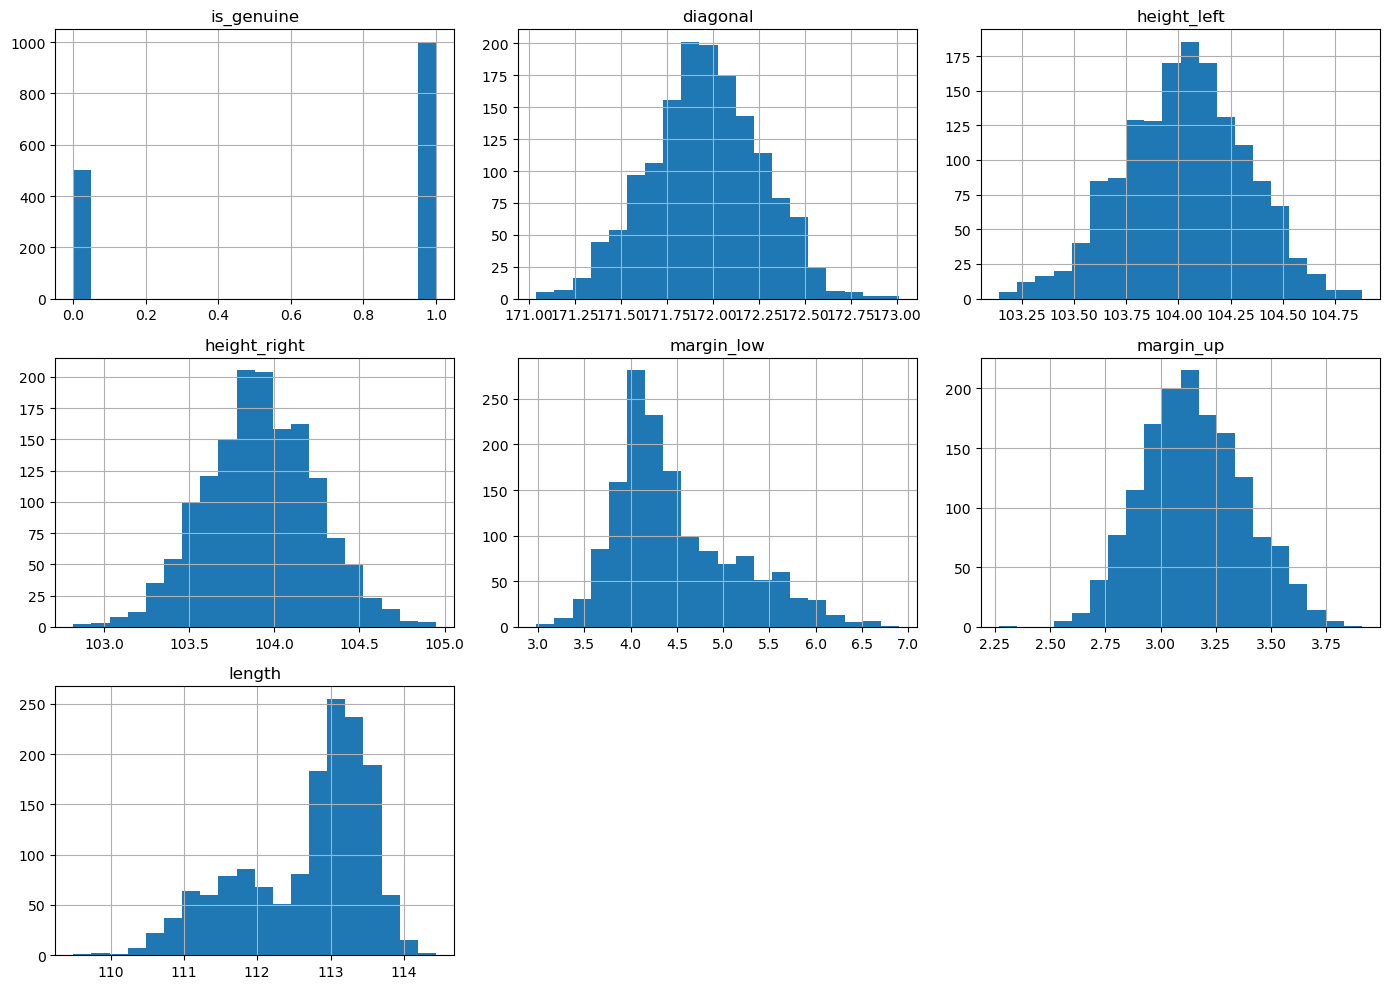

In [42]:
#Histogrammes
df.hist(bins=20, figsize=(14, 10))
plt.tight_layout()  # Ajuster l'espace pour éviter le chevauchement
plt.show()

- Variable categorielle : Pour la variable catégorielle, l'histogrammes montre le nombre d'occurrences de chaque catégorie.
- Variables continues : Pour les variables continues, les histogrammes montrent comment les valeurs sont distribuées.

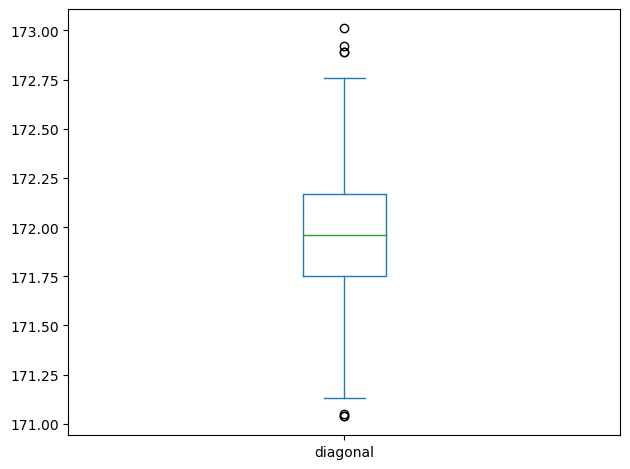

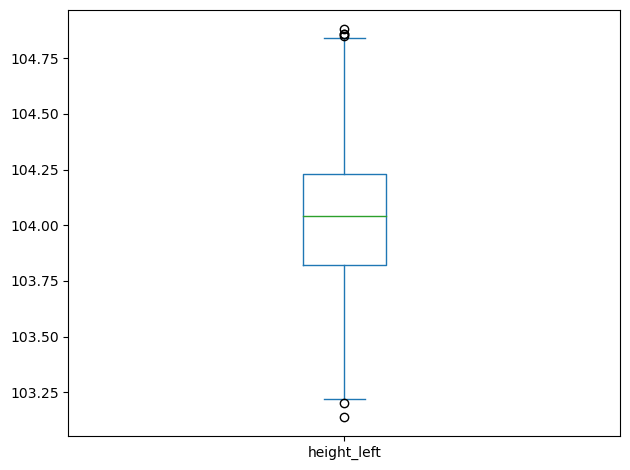

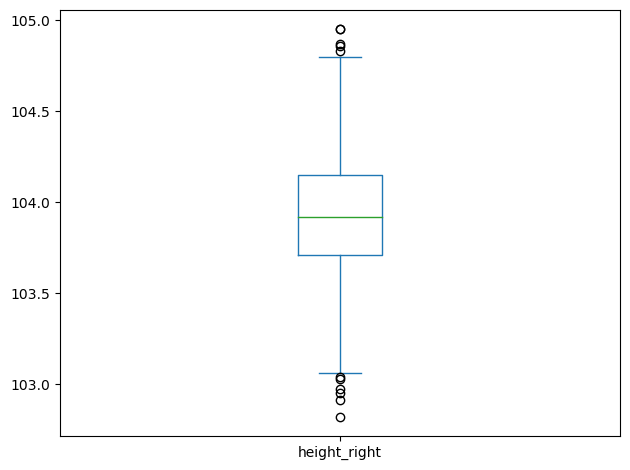

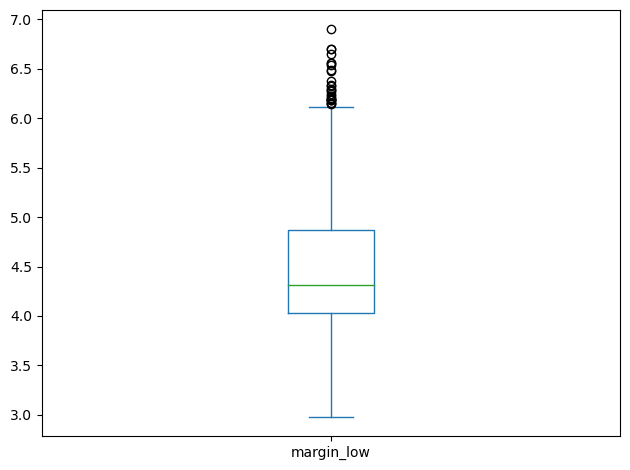

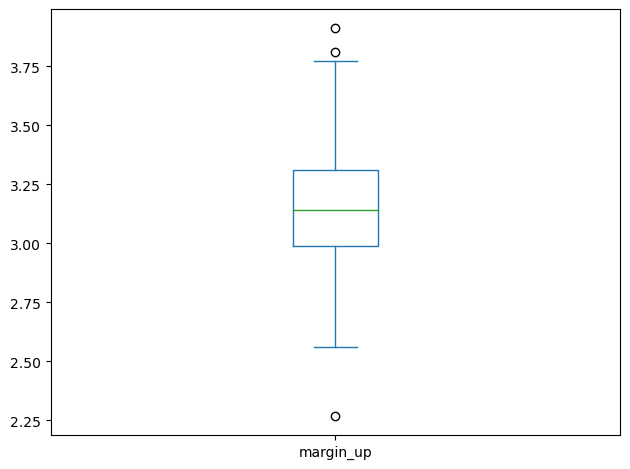

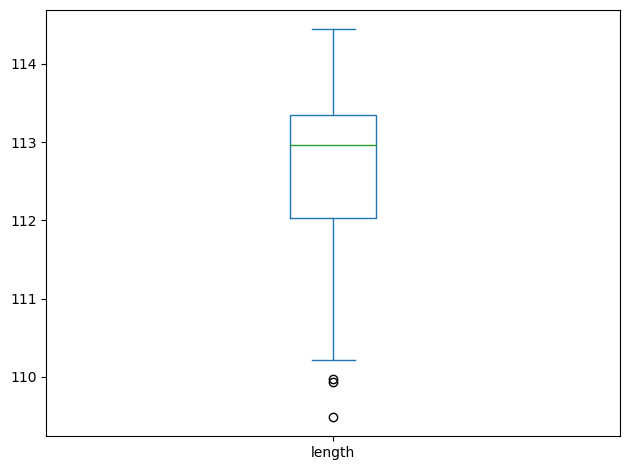

In [43]:
#Boxplot
variables = df[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']]
for var in variables:
    df[var].plot(kind='box')
    plt.tight_layout()
    plt.show()

Pas d'anomalie sur les outliers, la distribution semble être cohérente.

<div style="color: black; font-size: 13px;">
    <h2>4.2- Analyse bivariée</h2>
</div>

C:\Users\aimee\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


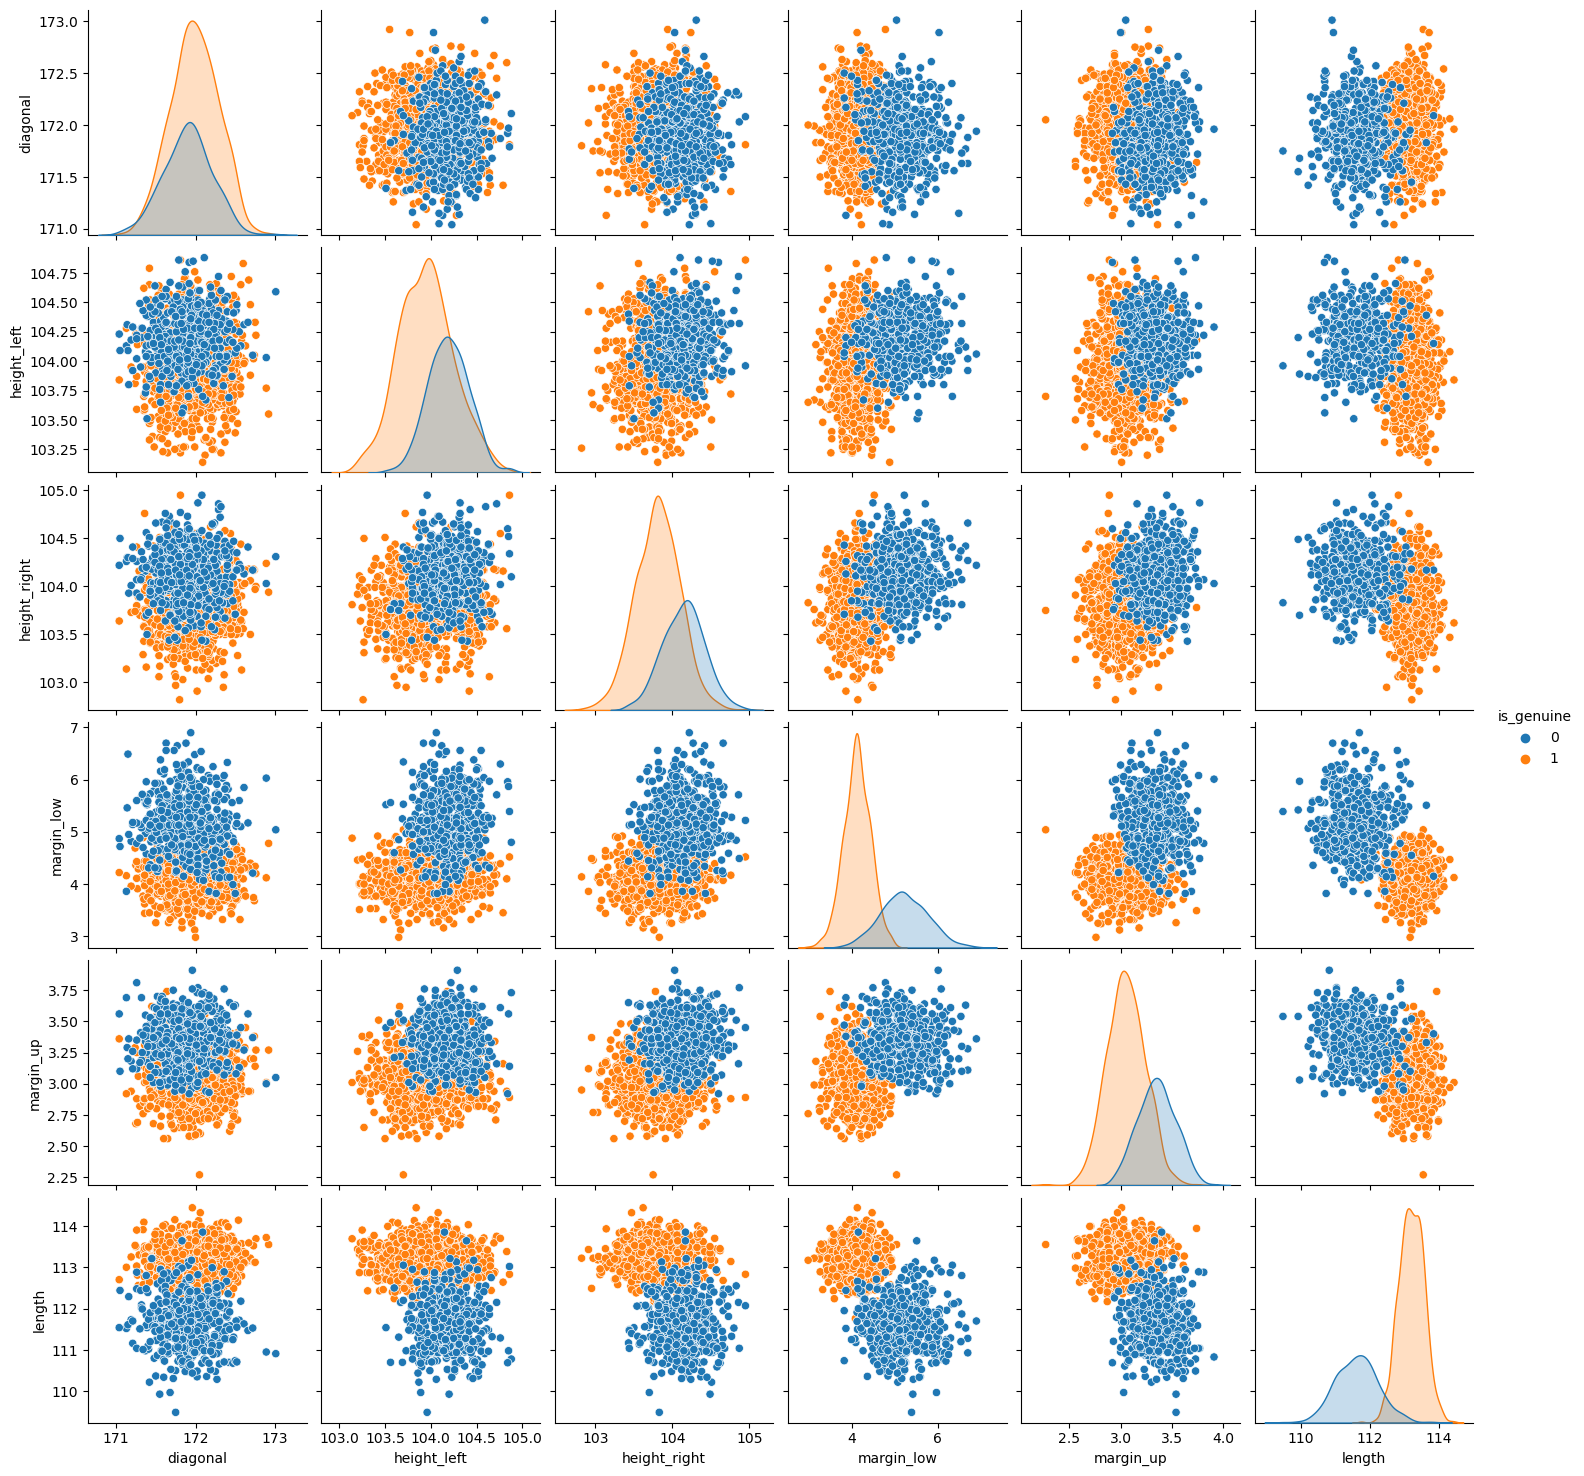

In [44]:
# PairPlots : visualiser les relations entre paires de variables continues.
sns.pairplot(df, hue="is_genuine")

- Les histogrammes sur la diagonale montrent la distribution des données pour chaque catégorie.
- Scatter Plots montrent la séparation des classes. Les graphiques où les points de deux classes sont bien séparés, indiquent que la combinaison de ces variables sur cet axe est utile pour différencier les billets vrais des faux. 

Nous pouvons identifier margin_low et length, margin_up et length, height_right et length.

<Axes: xlabel='length', ylabel='is_genuine'>

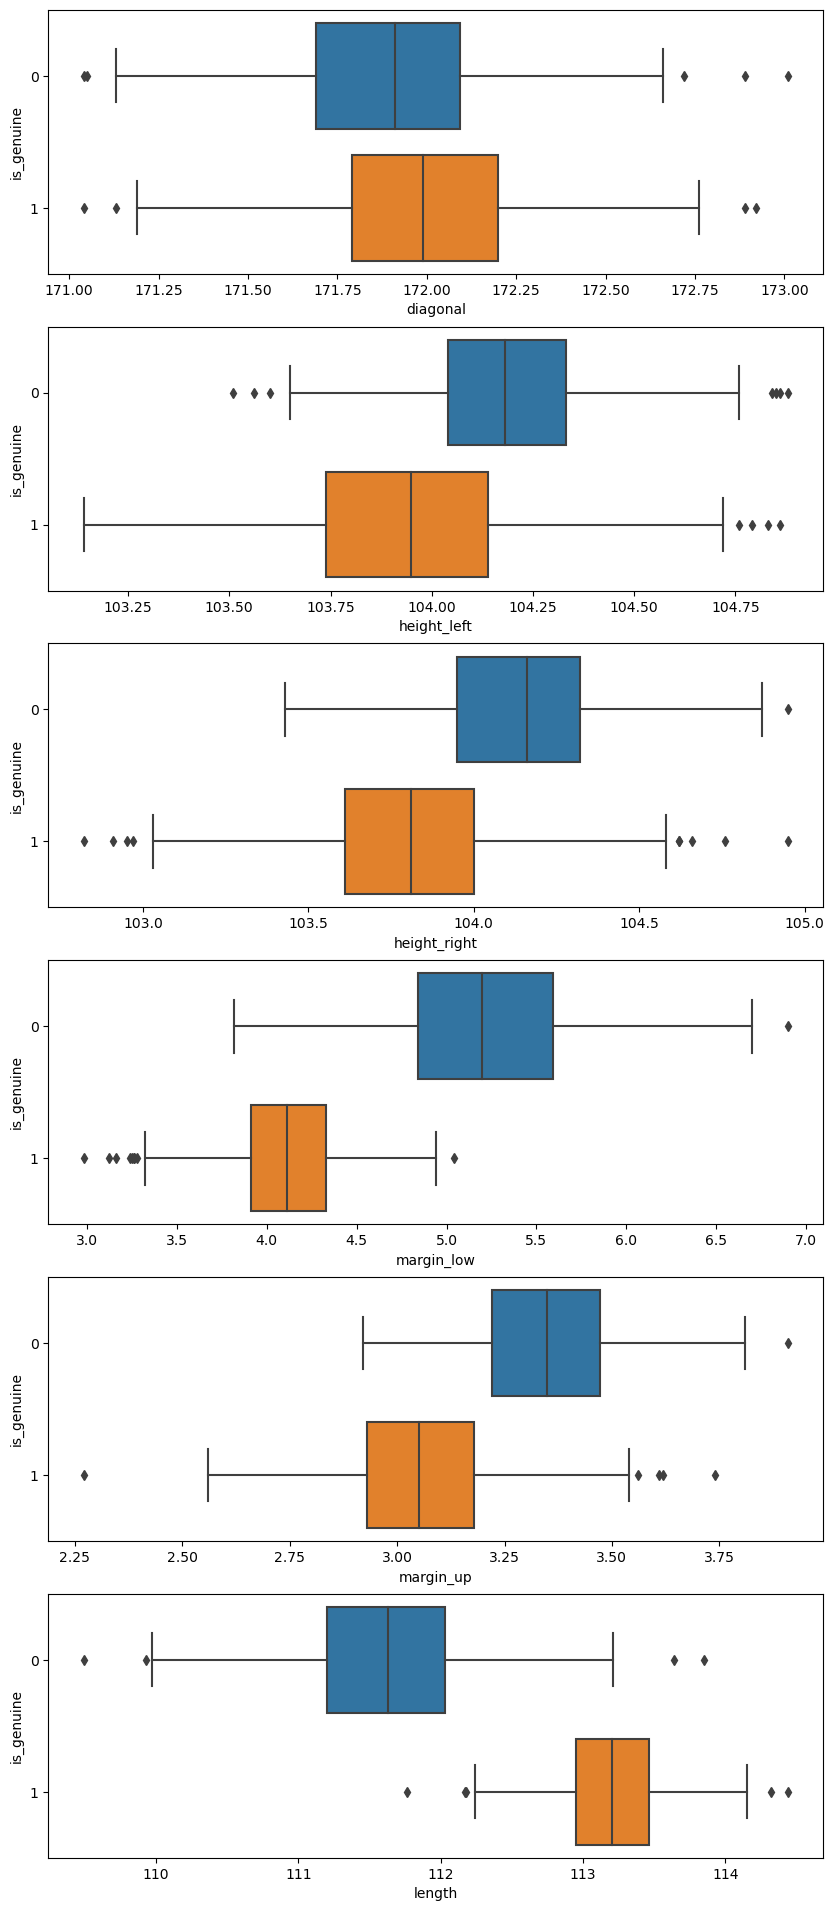

In [45]:
#Boxplot: comparer chaque variable avec la variable Cible
fig, axs = plt.subplots(6,1, figsize=(10,24))
sns.boxplot(df, ax=axs[0], orient="h", x='diagonal',y='is_genuine')
sns.boxplot(df, ax=axs[1], orient="h", x='height_left',y='is_genuine' )
sns.boxplot(df, ax=axs[2], orient="h", x='height_right',y='is_genuine')
sns.boxplot(df, ax=axs[3], orient="h", x='margin_low',y='is_genuine')
sns.boxplot(df, ax=axs[4], orient="h", x='margin_up',y='is_genuine')
sns.boxplot(df, ax=axs[5], orient="h", x='length',y='is_genuine')

Chaque boxplot compare les distributions des valeurs de chaque variable entre les vrais billets et faux billets. Par exemple: 
- **diagonal** : les médianes des deux types de types ne sont pas assez différentes cela suggère que la variable ne peut pas aider à authentifier un billet.

Nous pouvons identifier les  variables les plus pertinentes pour distinguer les vrais billets des faux.

<Axes: >

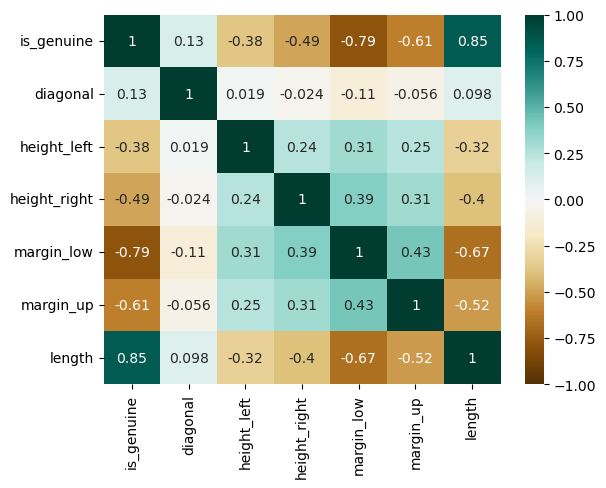

In [46]:
#Heatmap de Corrélation :monter les corrélations entre les variables.
sns.heatmap(df.corr(),cmap='BrBG', vmin=-1, vmax=1, annot=True)

Visuellement , nous voyons 4 variables très corrélées à 'is_genuine': length, margin_up, margin_low et height_right.

is_genuine
1    1000
0     500
Name: count, dtype: int64


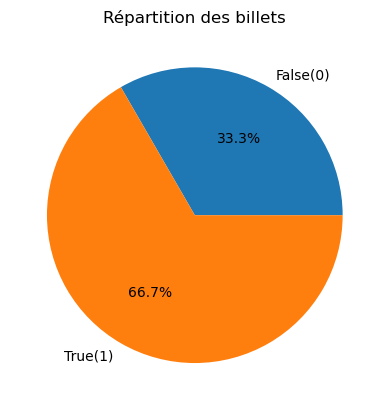

In [47]:
# Compter le nombre de vrais et faux billets
Nb_vrai_faux = df['is_genuine'].value_counts()
print(Nb_vrai_faux)

#Piechart: proportion de chaque billet dans le DataFrame
plt.pie(df.groupby(["is_genuine"])["diagonal"].count(),
        labels=["False(0)","True(1)"],
        autopct="%1.1f%%")

#sns.axis("equal")
plt.title("Répartition des billets")
plt.show()

<div style="color: black; font-size: 13px;">
    <h2>4.3- Analyse multivariée</h2>
</div>

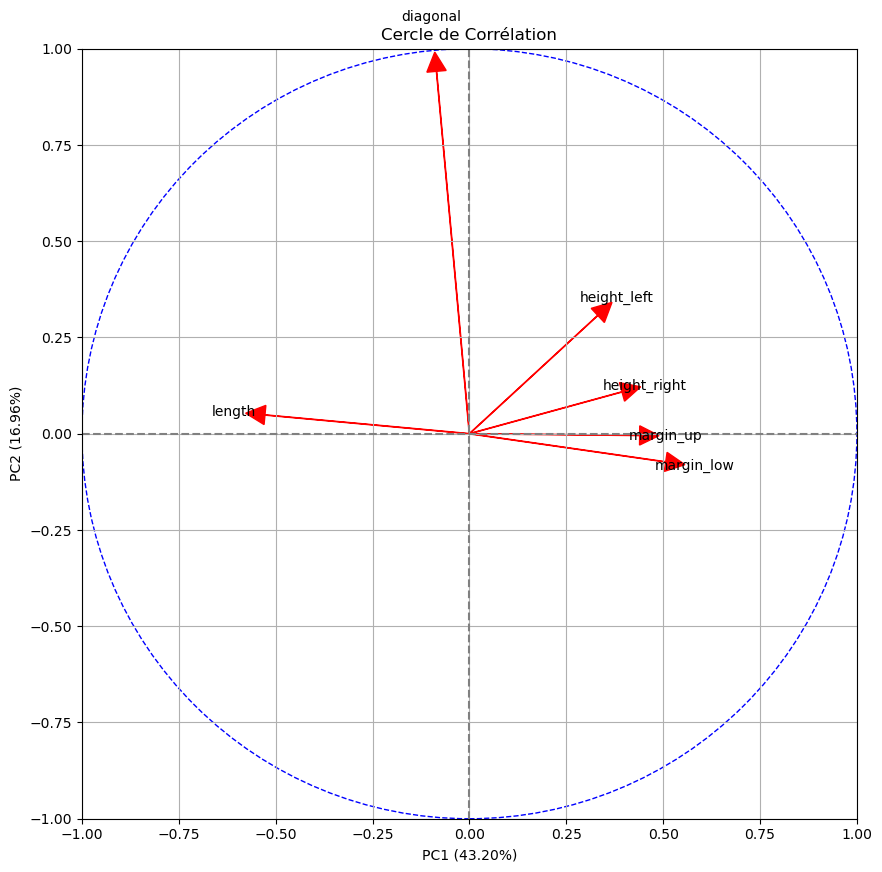

In [48]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

# Standardiser les données
features = ['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']
X = df[features]
X_standardized = StandardScaler().fit_transform(X)

# Réaliser l'ACP
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_standardized)

# Calculer les vecteurs propres
pcs = pca.components_

# Variance expliquée par les deux premières composantes principales
explained_variance = pca.explained_variance_ratio_

# Créer un DataFrame avec les composantes principales
df_pcs = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Cercle de corrélation
plt.figure(figsize=(10, 10))
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')

# Étiqueter les axes avec la proportion de variance expliquée
plt.xlabel(f'PC1 ({explained_variance[0]*100:.2f}%)')
plt.ylabel(f'PC2 ({explained_variance[1]*100:.2f}%)')
plt.title('Cercle de Corrélation')

# Tracer les variables sur le cercle de corrélation
for i, feature in enumerate(features):
    plt.arrow(0, 0, pcs[0, i], pcs[1, i], head_width=0.05, head_length=0.05, fc='red', ec='red')
    plt.text(pcs[0, i] * 1.15, pcs[1, i] * 1.15, feature, color='black', ha='center', va='center')

# Tracer le cercle
circle = plt.Circle((0, 0), 1, color='blue', fill=False, linestyle='--')
plt.gca().add_artist(circle)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.grid()
plt.show()


- La première composante principale (PC1) capture près de la moitié de la variance totale dans les données. Cela signifie qu'elle représente la dimension la plus importante pour différencier les billets vrais des faux. 
- Les variables margin_low, margin_up,height_right et length corrélées positivement ou négativement à cette composante sont celles qui contribuent le plus à cette distinction.

<div style="color: purple">
    <h1>5- Modélisation</h1>
</div>

<div style="color: black; font-size: 13px;">
    <h2>5.1- Modèle de Régression Logistique</h2>
</div>

**La régression logistique est une méthode de classification (supervisée)** qui permet de modéliser, de classifier, une variable binaire prenant des valeurs {0,1} en fonction de variables explicatives quantitatives et/ou qualitatives. 

In [49]:
# Commande glm (modèle linéaire généralisé) pour régression logistique avec famille binomial
reg_log = smf.glm('is_genuine ~  diagonal + height_left + height_right + margin_up + margin_low + length', data=df, family=sm.families.Binomial()).fit()

# Afficher le résumé du modèle
print(reg_log.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             is_genuine   No. Observations:                 1500
Model:                            GLM   Df Residuals:                     1493
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -39.487
Date:                Wed, 28 Aug 2024   Deviance:                       78.975
Time:                        11:06:40   Pearson chi2:                 2.80e+03
No. Iterations:                    10   Pseudo R-squ. (CS):             0.7049
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -231.2739    249.978     -0.925   

Nous constatons que certaines variables ne sont pas significatives car leur p-valeur n'est pas inférieure à 5 %, le niveau de test que nous souhaitons.

In [50]:
# On retire 'diagonal'
reg_log = smf.glm('is_genuine ~ height_left + height_right + margin_up + margin_low + length', data=df, family=sm.families.Binomial()).fit()

# Afficher le résumé du modèle
print(reg_log.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             is_genuine   No. Observations:                 1500
Model:                            GLM   Df Residuals:                     1494
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -39.515
Date:                Wed, 28 Aug 2024   Deviance:                       79.031
Time:                        11:06:44   Pearson chi2:                 2.80e+03
No. Iterations:                    10   Pseudo R-squ. (CS):             0.7049
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -186.0304    159.578     -1.166   

In [51]:
# On retire ensuite 'height_left '
reg_log = smf.glm('is_genuine ~  height_right + margin_up + margin_low + length', data=df, family=sm.families.Binomial()).fit()

# Afficher le résumé du modèle
print(reg_log.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             is_genuine   No. Observations:                 1500
Model:                            GLM   Df Residuals:                     1495
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -40.175
Date:                Wed, 28 Aug 2024   Deviance:                       80.351
Time:                        11:06:47   Pearson chi2:                 3.42e+03
No. Iterations:                    10   Pseudo R-squ. (CS):             0.7046
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -282.6640    139.403     -2.028   

Les variables suivantes : height_right, margin_up, margin_low et length sont significatives pour notre modèle car leur p_value est inférieure à 5% . Elles seront donc sélectionnées pour la suite

In [52]:
#Séparer les variables explicatives de la variable cible
X= df[[ 'height_right', 'margin_low', 'margin_up', 'length']] # Les variables explicatives
y = df['is_genuine'] # La variable cible

In [53]:
# Ajouter une constante pour l'interception
X =sm.add_constant(X)

In [54]:
# Diviser les données en apprentissage et test
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [55]:
from statsmodels.discrete.discrete_model import Logit
#Créer le modèle de regression logistique
logit_model = sm.Logit(y_train, X_train)

In [56]:
# Ajuster le model
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.028983
         Iterations 12


La valeur relativement faible de Current function suggère que le modèle est bien ajusté aux données.

In [57]:
# Afficher le résumé du modèle
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                 1200
Model:                          Logit   Df Residuals:                     1195
Method:                           MLE   Df Model:                            4
Date:                Wed, 28 Aug 2024   Pseudo R-squ.:                  0.9540
Time:                        11:06:57   Log-Likelihood:                -34.780
converged:                       True   LL-Null:                       -756.70
Covariance Type:            nonrobust   LLR p-value:                2.159e-311
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -249.7828    151.710     -1.646      0.100    -547.129      47.563
height_right    -3.2948      1.164     -2.831      0.005      -5.576      -1.014
margin_low      -5.5211      0.937     -5.89

- **LLR p_value** est inférieure à 5% cela veut dire que le modèle est statistiquement significatif. Ainsi, les variables sélectionnées pour connaître l'authenticité d'un billet sont pertinentes pour prédire d'autres billets.
- **Pseudo R-squ.(0.9540)**: mesure de la qualité de l'ajustement du modèle. Ainsi, le modèle explique environ 95.40% de la variabilité dans la variable dépendante. Cela suggère que le modèle est très performant.

<div>
    <h3 style="color:blue; font-size: 15;"> - Courbes ROC</h3>
</div>

**Courbe ROC** : tracé du tpr (taux de vrai positif) en fonction du fpr (taux de faux positif).

**AUC (Area Under the Curve)** : mesure de la qualité de la classification. 

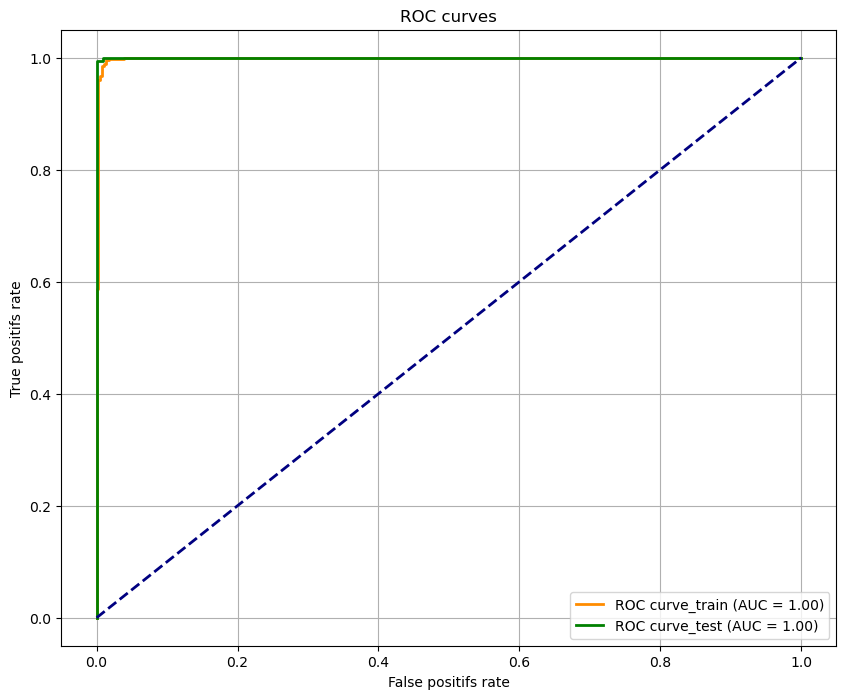

In [58]:
#Obtenir les prédictions du modèle sur l'ensemble d'entrainement et test
y_train_pred = result.predict(X_train)
y_test_pred = result.predict(X_test)

# Calculer les courbes ROC et les aires sous la courbe (AUC)
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_pred)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_pred)
roc_auc_test = auc(fpr_test, tpr_test)

# Tracer les courbes ROC
plt.figure(figsize=(10,8))
plt.plot(fpr_train, tpr_train, color ='darkorange', lw=2, label='ROC curve_train (AUC = %0.2f)' %roc_auc_train)
plt.plot(fpr_test, tpr_test, color ='green', lw=2, label='ROC curve_test (AUC = %0.2f)' %roc_auc_test)
plt.plot([0,1],[0,1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positifs rate')
plt.ylabel('True positifs rate')
plt.title('ROC curves')
plt.legend(loc ="lower right")
plt.grid()
plt.show()

**AUC = 1** : signifie que le modèle est capable de séparer parfaitement les classes positives et négatives sur l'ensemble d'entrainement et test. 

In [59]:
from sklearn.metrics import classification_report
# Convertir les probabilités en prédictions binaires (0 ou 1)
y_test_pred = (y_test_pred > 0.5).astype(int)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       110
           1       0.99      1.00      0.99       190

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



<div>
    <h3 style="color:blue; font-size: 15;"> - Matrice de confusion</h3>
</div>

**La matrice de confusion** est un outil précieux pour évaluer la performance d'un modèle de classification en montrant comment les prédictions du modèle se comparent aux valeurs réelles. Elle affiche le nombre de vrais positifs (TP), vrais négatifs (TN), faux positifs (FP) et faux négatifs (FN).

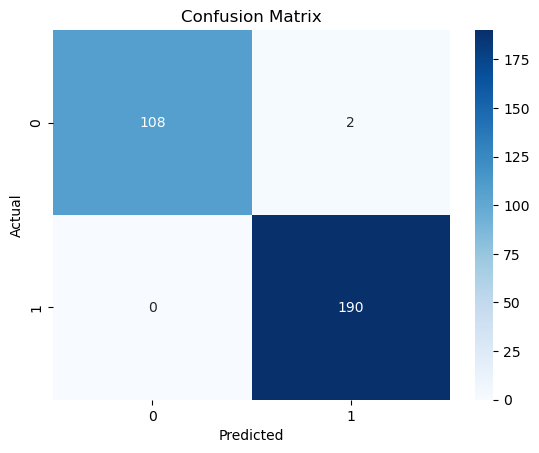

Accuracy : 0.9933
Precision : 0.9896
Recall : 1.0000
Score F1 : 0.9948


In [60]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Matrice de confusion
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculer les métriques de performance
accuracy = (cm[0, 0] + cm[1, 1]) / np.sum(cm)
precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])
f1_score = 2 * (precision * recall) / (precision + recall)

print(f'Accuracy : {accuracy:.4f}')
print(f'Precision : {precision:.4f}')
print(f'Recall : {recall:.4f}')
print(f'Score F1 : {f1_score:.4f}')

le modèle de regression logistique appliqué au jeu de test prédit:
- le nombre de **vrai positif** est 190 ;
- le nombre de **vrai négatif** est 108 ;
- le nombre de **faux positif** est 2 ;
- le nombre de **faux négatif** est 0.

- **Accuracy** : pourcentage de prédictions correctes parmi le total des prédictions effectuées. Une accuracy de 0.9933 signifie que 99.33% des prédictions faites par le modèle sont correctes.
- **¨Précision** : pourcentage de vraies prédictions positives parmi toutes les prédictions positives effectuées par le modèle. Une precision de 0.9896 signifie que 98.96% des prédictions positives du modèle sont correctes.
- **Recall (ou sensibilité)** : pourcentage de vraies prédictions positives parmi tous les cas positifs dans les données réelles. Un recall de 1.0 signifie que le modèle a réussi à identifier tous les cas positifs présents dans les données.
- **F1 score** de 0.9948 indique un bon équilibre entre precision et recall.

Ainsi, le modèle est capable d'identifier correctement les cas positifs et pour minimiser les faux positifs et les faux négatifs.

<div style="color: black; font-size: 13px;">
    <h2>5.2- Modèle K-Means</h2>
</div>

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans

# Créer une copie de df pour le kmeans
df_kmeans = df.copy()

In [62]:
# Sélectionner les variables indépendantes et la variable dépendante
X= df_kmeans[[ 'height_right', 'margin_low', 'margin_up', 'length']]
y = df_kmeans['is_genuine']

In [63]:
# On créer notre train set et test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [64]:
#Standardiser les données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\Users\aimee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\aimee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\aimee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\aimee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

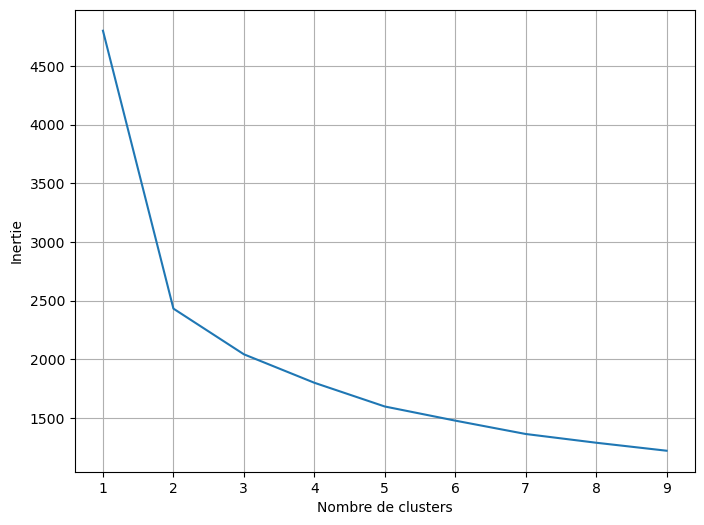

Inertie totale : 1221.8557221414417


In [65]:
#Chercher le nombre optimal de clusters: méthode du coude
inertia = []
k_range=range(1,10)
for k in k_range:
    km_model =KMeans(n_clusters=k).fit(X_train_scaled)
    inertia.append(km_model.inertia_)

# Tracer le graphe de l'inertie en fonction du nombre de clusters
fig = plt.figure(figsize=(8,6))
plt.plot(k_range,inertia )
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.grid() 
plt.show()
print('Inertie totale :',km_model.inertia_)

Le graphe de coude montre une zone correspondante à 2 clusters qui est bien visible.

In [66]:
# Affecter à notre modèle KMeans() le nombre de clusters
km_model =KMeans(n_clusters=2)

In [67]:
# Initialiser et entraîner le modèle K-Means
km_model = KMeans(n_clusters=2, random_state=42)
km_model.fit(X_train_scaled)

C:\Users\aimee\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=42)

In [68]:
# Appliquer le K-Means sur l'ensemble d'entrainement et test
y_train_pred_kmeans = km_model.predict(X_train_scaled)
y_test_pred_kmeans = km_model.predict(X_test_scaled)

In [69]:
# On créé une colonne dans notre table en ajoutant les labels calculé par le model
X_test["cluster"] = y_test_pred_kmeans

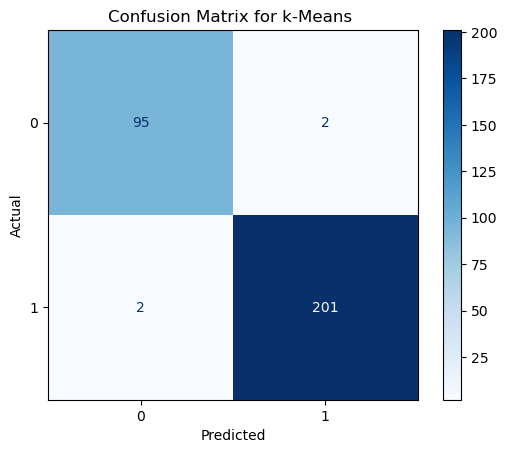

Accuracy : 0.9867
Precision : 0.9901
Recall : 0.9901
Score F1 : 0.9901
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        97
           1       0.99      0.99      0.99       203

    accuracy                           0.99       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.99      0.99      0.99       300



In [70]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Ajuster les prédictions pour correspondre aux étiquettes réelles
if np.sum(y_test_pred_kmeans == 0) > np.sum(y_test_pred_kmeans == 1):
    y_test_pred_kmeans = 1 - y_test_pred_kmeans

# Calculer la matrice de confusion pour les données de test
conf_matrix_kmeans_test = confusion_matrix(y_test, y_test_pred_kmeans)

ConfusionMatrixDisplay(conf_matrix_kmeans_test, display_labels=['0', '1']).plot(cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for k-Means ')
plt.show()

# Calculer les métriques de performance
accuracy_test = (conf_matrix_kmeans_test[0, 0] + conf_matrix_kmeans_test[1, 1]) / np.sum(conf_matrix_kmeans_test)
precision_test = conf_matrix_kmeans_test[1, 1] / (conf_matrix_kmeans_test[1, 1] + conf_matrix_kmeans_test[0, 1])
recall_test = conf_matrix_kmeans_test[1, 1] / (conf_matrix_kmeans_test[1, 1] + conf_matrix_kmeans_test[1, 0])
f1_score_test = 2 * (precision_test * recall_test) / (precision_test + recall_test)

print(f'Accuracy : {accuracy_test:.4f}')
print(f'Precision : {precision_test:.4f}')
print(f'Recall : {recall_test:.4f}')
print(f'Score F1 : {f1_score_test:.4f}')

# Générer le rapport de classification pour les données de test
print(classification_report(y_test, y_test_pred_kmeans))

le modèle de Kmeans appliqué au jeu de test prédit:
- le nombre de **vrai positif** est 201 ;
- le nombre de **vrai négatif** est 95 ;
- le nombre de **faux positif** est 2 ;
- le nombre de **faux négatif** est 2.

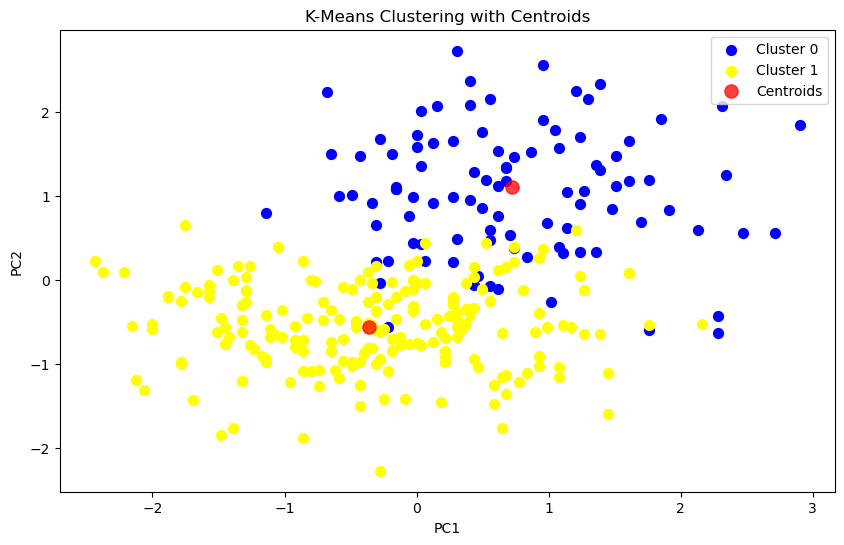

In [71]:
# Nuage de points avec les centroïdes
plt.figure(figsize=(10, 6))
colors = ['blue', 'yellow']  # Define colors for the two clusters
for i in range(2):  # Plot each cluster with a different color
    plt.scatter(X_test_scaled[y_test_pred_kmeans == i, 0], X_test_scaled[y_test_pred_kmeans == i, 1], 
                s=50, c=colors[i], label=f'Cluster {i}')
centroids = km_model.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=90, alpha=0.75, label='Centroids')  # Reduce size of centroids
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clustering with Centroids')
plt.legend()
plt.show()

<div style="color: purple">
    <h1>6- Choix du modèle</h1>
</div>

- $Accuracy$ : <b style="color: green;">La régression logistique</b> a une précision globale légèrement supérieure ($0.9933$) par rapport à <b style="color: red;">k-Means</b> ($0.9867$).
- $Precision$ : La précision est pratiquement égale entre les deux modèles, avec <b style="color: green;">k-Means</b> légèrement supérieur ($0.9901$) par rapport à <b style="color: red;">la régression logistique</b> ($0.9896$).
- $Recall$ : <b style="color: green;">La régression logistique</b> a un rappel parfait ($1.0000$), ce qui signifie qu'elle a identifié tous les vrais positifs, tandis que <b style="color: red;">k-Means</b> a un rappel légèrement inférieur ($0.9901$).
- $F1 Score$ : <b style="color: green;">La régression logistique</b> a un F1 Score légèrement supérieur ($0.9948$) comparé à <b style="color: red;">k-Means</b> ($0.9901$).

Sur la base de ces métriques, le modèle de régression logistique semble être le meilleur choix car il a une meilleure accuracy, un recall parfait, et un F1 Score légèrement supérieur. Ces résultats indiquent que la régression logistique est légèrement plus performante que k-Means pour prédire nos billets. 

<div style="color: purple">
    <h1>7- Test en direct</h1>
</div>

In [80]:
# Importer les données
df_test = pd.read_csv('billets_test.csv ', sep=',')

In [81]:
#vérification que les données sont correctement importées
df_test.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,172.09,103.95,103.73,4.39,3.09,113.19,B_1
1,171.52,104.17,104.03,5.27,3.16,111.82,B_2
2,171.78,103.80,103.75,3.81,3.24,113.39,B_3
3,172.02,104.08,103.99,5.57,3.30,111.10,B_4
4,171.79,104.34,104.37,5.00,3.07,111.87,B_5


In [82]:
# Appliquer le modèle sur le jeu de test
predict_billet = reg_log.predict(df_test).round(0)
predict_billet_df = pd.DataFrame(predict_billet)
predict_billet_df.rename(columns={0: 'type_pred_log'}, inplace=True)  # Renommer la colonne

# Fusion dans un df qui inclut les données d'entrée et la prédiction
df_prod_log = pd.merge(df_prod, predict_billet_df, left_index=True, right_index=True, how='left')

# Attribution du type de billet plus explicite sans inversion
df_prod_log['bool_pred_log'] = list(map(bool, df_prod_log['type_pred_log']))

# Calcul du nombre de billets via la fonction value_counts
nb_billets = df_prod_log['bool_pred_log'].value_counts()

# Affichage du résultat
df_prod_log[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length', 'id', 'bool_pred_log']]


,diagonal,height_left,height_right,margin_low,margin_up,length,id,bool_pred_log
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1,True
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2,False
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,True
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,False
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5,False


In [83]:
# On compte le nombre de chaque type
nbre = df_prod_log['bool_pred_log'].value_counts()
nbre = pd.DataFrame(nbre)
print('Soit par type de billets:')
nbre

Soit par type de billets:


,count
bool_pred_log,
False,3
True,2
